In [4]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [7]:
np.random.seed(20)
data_size=200
monthly_charges=np.random.normal(70,20,data_size)
tenure=np.random.normal(24,12,data_size)
#formula to get status of churn
churn = (monthly_charges * 0.3 - tenure * 0.4 + np.random.normal(0, 5, data_size)) > 5


In [8]:
df=pd.DataFrame({
    'monthly_charges':monthly_charges,
    'tenure':tenure,
    'churn':churn.astype(int)
})
df

,monthly_charges,tenure,churn
0,87.677862,5.952266,1
1,73.917300,39.767614,0
2,77.150730,23.638487,1
3,23.134762,31.620157,0
4,48.303348,30.029223,0
...,...,...,...
195,52.210445,12.792338,1
196,37.682016,29.651053,0
197,52.960708,43.769821,0
198,69.176397,19.117705,1


In [9]:
X=df.drop("churn",axis=1)
Y=df["churn"]

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=20)

In [11]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [12]:
Y_pred=model.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [13]:
#the way to predicted the corrected vlaue that our model predicted
corrected_pred=(Y_test==Y_pred)
corrected_pred

150     True
28      True
13      True
178     True
109     True
168     True
177     True
196     True
47      True
195     True
136     True
77     False
187     True
166     True
84      True
175     True
155    False
167    False
121     True
192     True
176     True
113     True
89     False
147     True
185     True
143     True
199     True
126     True
5       True
97      True
34      True
139     True
44      True
72      True
183    False
85      True
149     True
46      True
86      True
112     True
152     True
67      True
133     True
59      True
63      True
184     True
174     True
122     True
111     True
130     True
12      True
129     True
51      True
153     True
88      True
1      False
55      True
80      True
158     True
64      True
Name: churn, dtype: bool

In [25]:
X_test[corrected_pred]

,monthly_charges,tenure
150,82.198356,27.184698
28,72.575567,13.326298
13,53.152641,22.258712
178,109.108642,12.270414
109,32.959235,11.434940
168,107.000878,-0.821922
177,98.409969,12.664662
196,37.682016,29.651053
47,97.155780,26.630035
195,52.210445,12.792338


In [14]:
conf_matrix=confusion_matrix(Y_test,Y_pred)
conf_matrix

array([[ 6,  4],
       [ 2, 48]], dtype=int64)

In [15]:
acc_score=accuracy_score(Y_test,Y_pred)
acc_score

0.9

In [16]:
class_report=classification_report(Y_test,Y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       0.75      0.60      0.67        10\n           1       0.92      0.96      0.94        50\n\n    accuracy                           0.90        60\n   macro avg       0.84      0.78      0.80        60\nweighted avg       0.89      0.90      0.90        60\n'

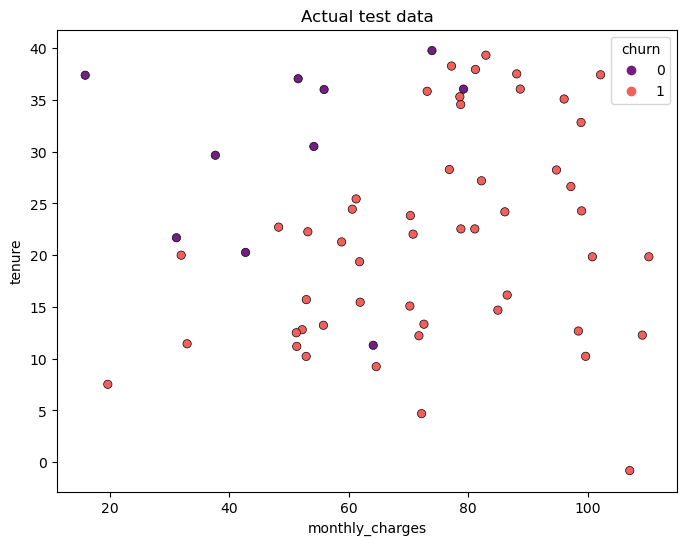

In [20]:
#METHOD-1 TO SHOW THE GRAPTH BY CALLING THE LABEL OF THE COULMN
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['monthly_charges'],y=X_test['tenure'],hue=Y_test,palette='magma',edgecolor='black')
plt.title("Actual test data")
plt.show()

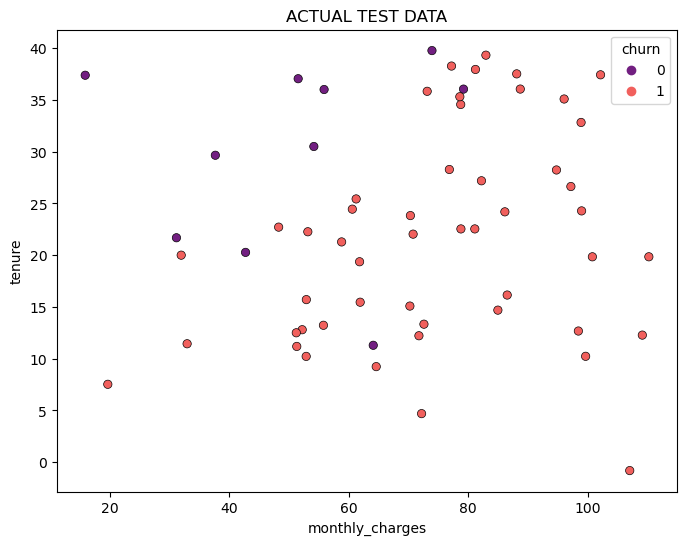

In [21]:
#METHOD-2 TO SHOW THE GRAPTH BY CALLING THE INDEX OF THE COULMN USING iloc command
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.iloc[:,0],y=X_test.iloc[:,1],hue=Y_test,palette='magma',edgecolor="black")
plt.title("ACTUAL TEST DATA")
plt.show()

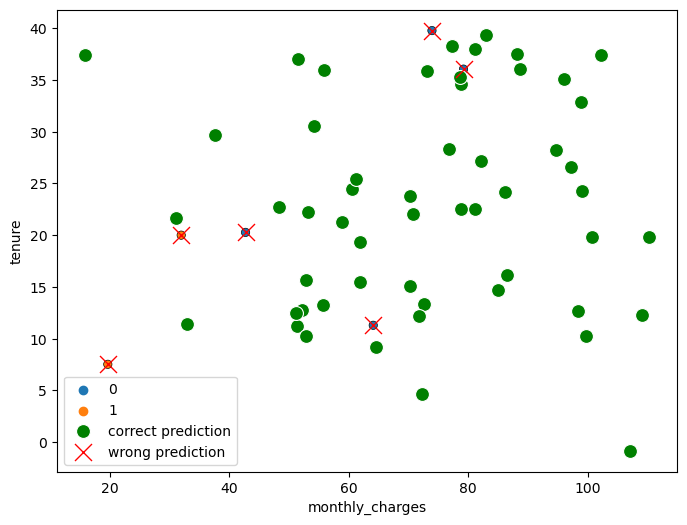

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.iloc[:,0],y=X_test.iloc[:,1],hue=Y_test,edgecolor="black")
sns.scatterplot(x=X_test[corrected_pred].iloc[:,0],y=X_test[corrected_pred].iloc[:,1],color='green',marker='o',s=100,label="correct prediction")
sns.scatterplot(x=X_test[~corrected_pred].iloc[:,0],y=X_test[~corrected_pred].iloc[:,1],color='red',marker='x',s=150,label="wrong prediction")
plt.legend()
plt.show()